## Exploring COVID-19 tests by location (NSW)
Data Source - [data.gov.au](https://data.gov.au/dataset/ds-nsw-60616720-3c60-4c52-b499-751f31e3b132/details?q=COVID-19)

COVID-19 tests by date and postcode, local health district, and local government area. The dataset is updated daily, except on weekends.

The data is for COVID-19 tests and is based on where a person has been tested and is undergoing public health management at the time of the test. A surge in total number of people tested on a particular day may occur as the test results are updated in batches and new laboratories gain testing capacity.

The underlying dataset was assessed to measure the risk of identifying an individual and the level of sensitivity of the information gained if it was known that an individual was in the dataset. The dataset was then treated to mitigate these risks, including suppressing and aggregating data.

1. There has been a recent spike in NSW cases and testing has increased across the state
2. The data analysis created below can be used to notify people who live in high testing districts

### Importing the source data, cleansing and creating new dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('covid-19-tests-by-date-and-postcode-local-health-district-and-local-government-area.csv')

In [3]:
df['postcode'] = df['postcode'].apply(str)

In [4]:
df['lga_code19'] = df['lga_code19'].apply(str)

In [5]:
df['postcode'] = df['postcode'].replace('\.0','',regex=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df = df.rename(columns={'lhd_2010_name':'district','lga_name19':'area'})

In [8]:
df['test_date'] = pd.to_datetime(df['test_date'])

In [9]:
data = df[['test_date','postcode','district','area']]

### Test cases by date
1. Testing commenced on the 1st of January 2020
2. In early June testing started to pick up again
3. In the first week of July NSW recorded the most completed tests YTD, which was eclipsed in the followin week

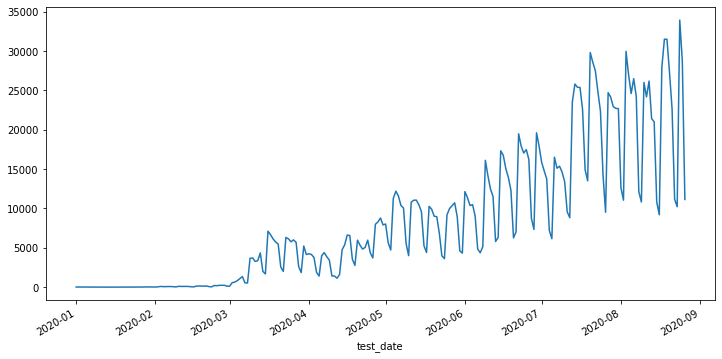

In [10]:
data.groupby('test_date').size().plot(kind='line',figsize=(12,6))
plt.show()

### Test cases by District and Area. Sorted by highest results. Top 10 post codes

In [11]:
top10 = data.groupby(['district']).size().sort_values(ascending=False).head(10)

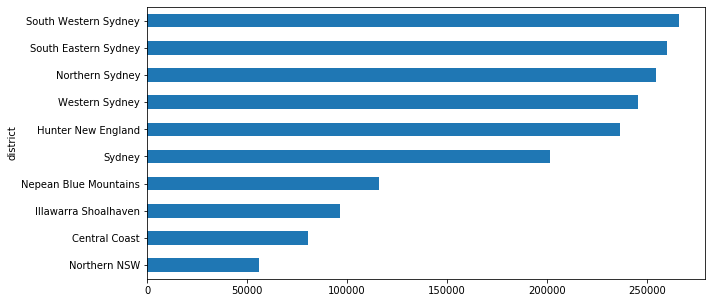

In [12]:
top10.groupby('district').sum().sort_values().plot(kind='barh',figsize=(10,5))
plt.show()

### COVID-19 tests conducted in the last week

In [13]:
lw = data[data['test_date']>='2020-08-17']

In [14]:
lw_top10 = lw.groupby(['district']).size().sort_values(ascending=False).head(10)

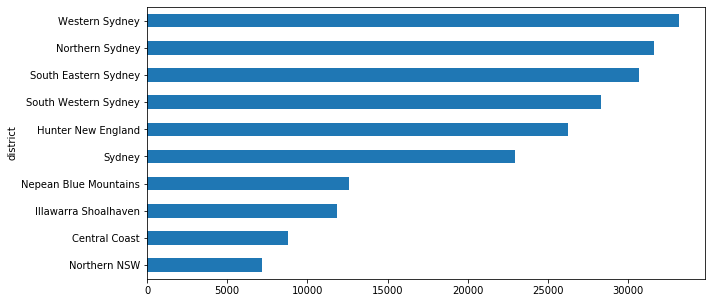

In [15]:
lw_top10.groupby('district').sum().sort_values().plot(kind='barh',figsize=(10,5))
plt.show()

In [16]:
lw.groupby(['district','area','postcode']).size().sort_values(ascending=False).head(10)

district               area                     postcode
Western Sydney         Cumberland (A)           2145        3040
South Western Sydney   Liverpool (C)            2170        3000
                       Campbelltown (C) (NSW)   2560        2759
Western Sydney         The Hills Shire (A)      2155        2610
                                                2153        2346
South Western Sydney   Camden (A)               2570        2148
Western Sydney         Blacktown (C)            2148        1967
Nepean Blue Mountains  Penrith (C)              2747        1793
Central Coast          Central Coast (C) (NSW)  2250        1777
Nepean Blue Mountains  Penrith (C)              2750        1721
dtype: int64